### Reading the dataset

In [ ]:
import numpy as np

In [ ]:
f1 = open("dataset2/dataset.arff")

### Removing the unwanted lines

In [ ]:
line = f1.readline()

i = 0
while(line):
    line = f1.readline()
    if i==47:
        break
    
    i+=1

In [ ]:
print(line)

### Reading the actual dataset

In [ ]:
dataset_tmp = []
dataset_tmp.append(line)

while line:
    line = f1.readline()
    
    if line == '':
        break
    
    dataset_tmp.append(line)


In [ ]:
print("length of the dataset", len(dataset_tmp))

In [ ]:
print(dataset_tmp[0])

In [ ]:
def custom_parser(text):
    list_word = []
    text = text[:-1]
    
    word = ""
    
    i=0
    while(i<len(text)):
        if text[i] == ',':
            list_word.append(word)
            word=""
        
        elif text[i] == '\'':
            i+=1
            
            while (text[i] != '\''):
                word=word+text[i]
                i+=1
                
                if(i<len(text)-1):
                    if(text[i]=='\'' and text[i+1]!=','):
                        word = word+'\''
                        i+=1
        
        else:
            word = word+text[i]
        
        i+=1
        
    list_word.append(word)
    return list_word

In [ ]:
custom_parser("fdcc1a6b-4854-4cde-bb60-248f478fa5b6,09/11/2019,09:56:00,MCP,'2nd District, Bethesda','STOP LIGHTS (*)','27 @ SWEEPSTAKES RD',39.259626666666705,-77.22376,No,No,No,No,No,No,No,No,No,No,?,?,?,?,?,?,?,MD,'02 - Automobile',2005,NISSAN,MURANO,MAROON,ESERO,64*,?,False,HISPANIC,F,DAMASCUS,MD,MD,'B - Unmarked Patrol','(39.2596266666667, -77.22376)'\n")

In [ ]:
dataset= []

for i in dataset_tmp:
    #print(i)
    dataset.append(custom_parser(i))

In [ ]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install pandas

In [ ]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install numpy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset_np = np.array(dataset)

In [ ]:
dataset_np.shape

In [ ]:
dataset_np

### saving the cleaned dataset to a pickle file  

In [ ]:
import pickle

with open('dataset2/raw_dataset1.pickle', 'wb') as handle:
    pickle.dump(dataset_np, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Reading saved data from the pickle file

In [1]:
import pickle
with open('dataset2/raw_dataset.pickle', 'rb') as handle:
    dataset_np = pickle.load(handle)

print(dataset_np.shape)

(1578154, 43)


### visualizing the data

In [2]:
# for j in range(dataset_np.shape[1]):
    
#     k = dataset_np[:,j]
#     cnt=0

#     for i in k:
#         if i == "?":
#             cnt+=1

#     print("Number of missing values in column",j+1,":",cnt)

In [3]:
# print("shape of the dataset :",dataset_np.shape)

# for i in range(dataset_np.shape[1]):
#     print("Unique values in column",i+1,":",len(list(set(dataset_np[:,i]))))

In [4]:
for j in range(dataset_np.shape[1]):
    
    k = dataset_np[:,j]
    cnt=0

    for i in k:
        if i == "?":
            cnt+=1
            
    print("Number of missing values in column",j+1,":",cnt,", Unique Values :",len(list(set(dataset_np[:,j]))))

Number of missing values in column 1 : 0 , Unique Values : 895102
Number of missing values in column 2 : 0 , Unique Values : 2810
Number of missing values in column 3 : 0 , Unique Values : 1440
Number of missing values in column 4 : 0 , Unique Values : 1
Number of missing values in column 5 : 0 , Unique Values : 9
Number of missing values in column 6 : 9 , Unique Values : 14268
Number of missing values in column 7 : 2 , Unique Values : 214969
Number of missing values in column 8 : 0 , Unique Values : 302145
Number of missing values in column 9 : 0 , Unique Values : 343293
Number of missing values in column 10 : 0 , Unique Values : 2
Number of missing values in column 11 : 0 , Unique Values : 2
Number of missing values in column 12 : 0 , Unique Values : 2
Number of missing values in column 13 : 0 , Unique Values : 2
Number of missing values in column 14 : 0 , Unique Values : 2
Number of missing values in column 15 : 0 , Unique Values : 2
Number of missing values in column 16 : 0 , Uniqu

In [5]:
# We have to predict column-33


#1 seqid STRING
#2 date_of_stop STRING
#3 time_of_stop STRING
#4 agency STRING
#5 subagency STRING
#6 description STRING
#7 location STRING
#8 latitude REAL
#9 longitude REAL
#10 accident STRING
#11 belts STRING
#12 personal_injury STRING
#13 property_damage STRING
#14 fatal STRING
#15 commercial_license STRING
#16 hazmat STRING
#17 commercial_vehicle STRING
#18 alcohol STRING
#19 work_zone STRING
#20 search_conducted STRING
#21 search_disposition STRING
#22 search_outcome STRING
#23 search_reason STRING
#24 search_reason_for_stop STRING
#25 search_type STRING
#26 search_arrest_reason STRING
#27 state STRING
#28 vehicletype {'01 - Motorcycle', '02 - Automobile', '03 - Station Wagon', '04 - Limousine', '05 - Light Duty Truck', '06 - Heavy Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle', '09 - Farm Vehicle', '10 - Transit Bus', '11 - Cross Country Bus', '12 - School Bus', '13 - Ambulance', '13 - Ambulance(Emerg)', '14 - Ambulance', '14 - Ambulance(Non-Emerg)', '15 - Fire Vehicle', '15 - Fire(Emerg)', '16 - Fire(Non-Emerg)', '17 - Police(Emerg)', '18 - Police Vehicle', '18 - Police(Non-Emerg)', '19 - Moped', '20 - Commercial Rig', '21 - Tandem Trailer', '22 - Mobile Home', '23 - Travel/Home Trailer', '24 - Camper', '25 - Utility Trailer', '26 - Boat Trailer', '27 - Farm Equipment', '28 - Other', '29 - Unknown'}
#29 year INTEGER
#30 make STRING
#31 model STRING
#32 color STRING
#33 violation_type {Citation, ESERO, SERO, Warning}
#34 charge STRING
#35 article STRING
#36 contributed_to_accident {True, False}
#37 race {ASIAN, BLACK, HISPANIC, 'NATIVE AMERICAN', OTHER, WHITE}
#38 gender STRING
#39 driver_city STRING
#40 driver_state STRING
#41 dl_state STRING
#42 arrest_type {'A - Marked Patrol', 'B - Unmarked Patrol', 'C - Marked VASCAR', 'D - Unmarked VASCAR', 'E - Marked Stationary Radar', 'F - Unmarked Stationary Radar', 'G - Marked Moving Radar (Stationary)', 'H - Unmarked Moving Radar (Stationary)', 'I - Marked Moving Radar (Moving)', 'J - Unmarked Moving Radar (Moving)', 'K - Aircraft Assist', 'L - Motorcycle', 'M - Marked (Off-Duty)', 'N - Unmarked (Off-Duty)', 'O - Foot Patrol', 'P - Mounted Patrol', 'Q - Marked Laser', 'R - Unmarked Laser', 'S - License Plate Recognition'}
#43 geolocation STRING

In [6]:
import numpy as np
# Deleting the 4th column as it is of no use only one unique value is there.
# Deleting the 20th, 22th, 25th, 26th columns as majority of the values are missing there.

dataset_np = np.delete(dataset_np,[3,20,22,24,25,28,29,30,31,38,39,40],axis=1)


In [ ]:
#1 seqid STRING
#2 date_of_stop STRING
#3 time_of_stop STRING
#
#5 subagency STRING
#6 description STRING
#7 location STRING
#8 latitude REAL
#9 longitude REAL
#10 accident STRING
#11 belts STRING
#12 personal_injury STRING
#13 property_damage STRING
#14 fatal STRING
#15 commercial_license STRING
#16 hazmat STRING
#17 commercial_vehicle STRING
#18 alcohol STRING
#19 work_zone STRING
#20 search_conducted STRING
#
#22 search_outcome STRING
#
#24 search_reason_for_stop STRING
#
#
#27 state STRING
#28 vehicletype {'01 - Motorcycle', '02 - Automobile', '03 - Station Wagon', '04 - Limousine', '05 - Light Duty Truck', '06 - Heavy Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle', '09 - Farm Vehicle', '10 - Transit Bus', '11 - Cross Country Bus', '12 - School Bus', '13 - Ambulance', '13 - Ambulance(Emerg)', '14 - Ambulance', '14 - Ambulance(Non-Emerg)', '15 - Fire Vehicle', '15 - Fire(Emerg)', '16 - Fire(Non-Emerg)', '17 - Police(Emerg)', '18 - Police Vehicle', '18 - Police(Non-Emerg)', '19 - Moped', '20 - Commercial Rig', '21 - Tandem Trailer', '22 - Mobile Home', '23 - Travel/Home Trailer', '24 - Camper', '25 - Utility Trailer', '26 - Boat Trailer', '27 - Farm Equipment', '28 - Other', '29 - Unknown'}
#
#
#
#
#33 violation_type {Citation, ESERO, SERO, Warning}
#34 charge STRING
#35 article STRING
#36 contributed_to_accident {True, False}
#37 race {ASIAN, BLACK, HISPANIC, 'NATIVE AMERICAN', OTHER, WHITE}
#38 gender STRING
#
#
#
#42 arrest_type {'A - Marked Patrol', 'B - Unmarked Patrol', 'C - Marked VASCAR', 'D - Unmarked VASCAR', 'E - Marked Stationary Radar', 'F - Unmarked Stationary Radar', 'G - Marked Moving Radar (Stationary)', 'H - Unmarked Moving Radar (Stationary)', 'I - Marked Moving Radar (Moving)', 'J - Unmarked Moving Radar (Moving)', 'K - Aircraft Assist', 'L - Motorcycle', 'M - Marked (Off-Duty)', 'N - Unmarked (Off-Duty)', 'O - Foot Patrol', 'P - Mounted Patrol', 'Q - Marked Laser', 'R - Unmarked Laser', 'S - License Plate Recognition'}
#43 geolocation STRING

In [ ]:
for j in range(dataset_np.shape[1]):
    
    k = dataset_np[:,j]
    cnt=0

    for i in k:
        if i == "?":
            cnt+=1

    print("Number of missing values in column",j+1,":",cnt,", Unique Values :",len(list(set(dataset_np[:,j]))))

In [ ]:
# We have to predict column-28


#1 seqid STRING
#2 date_of_stop STRING
#3 time_of_stop STRING
#
#4 subagency STRING
#5 description STRING --- need to impute (unique values 14268) ->done
#6 location STRING --- need to impute (unique values 214969) ->done
#7 latitude REAL
#8 longitude REAL
#9 accident STRING
#10 belts STRING
#11 personal_injury STRING
#12 property_damage STRING
#13 fatal STRING
#14 commercial_license STRING
#15 hazmat STRING
#16 commercial_vehicle STRING
#17 alcohol STRING
#18 work_zone STRING
#19 search_conducted STRING --- need to impute
#
#20 search_outcome STRING --- need to impute
#
#21 search_reason_for_stop STRING --- need to impute
#
#
#22 state STRING --- need to impute ->done
#23 vehicletype {'01 - Motorcycle', '02 - Automobile', '03 - Station Wagon', '04 - Limousine', '05 - Light Duty Truck', '06 - Heavy Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle', '09 - Farm Vehicle', '10 - Transit Bus', '11 - Cross Country Bus', '12 - School Bus', '13 - Ambulance', '13 - Ambulance(Emerg)', '14 - Ambulance', '14 - Ambulance(Non-Emerg)', '15 - Fire Vehicle', '15 - Fire(Emerg)', '16 - Fire(Non-Emerg)', '17 - Police(Emerg)', '18 - Police Vehicle', '18 - Police(Non-Emerg)', '19 - Moped', '20 - Commercial Rig', '21 - Tandem Trailer', '22 - Mobile Home', '23 - Travel/Home Trailer', '24 - Camper', '25 - Utility Trailer', '26 - Boat Trailer', '27 - Farm Equipment', '28 - Other', '29 - Unknown'}
#
# 
#
#
#24 violation_type {Citation, ESERO, SERO, Warning}
#25 charge STRING
#26 article STRING --- need to impute ->done
#27 contributed_to_accident {True, False}
#28 race {ASIAN, BLACK, HISPANIC, 'NATIVE AMERICAN', OTHER, WHITE}
#29 gender STRING
#
#
#
#30 arrest_type {'A - Marked Patrol', 'B - Unmarked Patrol', 'C - Marked VASCAR', 'D - Unmarked VASCAR', 'E - Marked Stationary Radar', 'F - Unmarked Stationary Radar', 'G - Marked Moving Radar (Stationary)', 'H - Unmarked Moving Radar (Stationary)', 'I - Marked Moving Radar (Moving)', 'J - Unmarked Moving Radar (Moving)', 'K - Aircraft Assist', 'L - Motorcycle', 'M - Marked (Off-Duty)', 'N - Unmarked (Off-Duty)', 'O - Foot Patrol', 'P - Mounted Patrol', 'Q - Marked Laser', 'R - Unmarked Laser', 'S - License Plate Recognition'}
#31 geolocation STRING

In [20]:
import copy
# dataset_without_id=np.delete(dataset_np,0, axis=1)
dataset_without_id = copy.deepcopy(dataset_np)
dataset_without_id.shape

(1578154, 31)

In [8]:
from collections import Counter

def missing_value_impute_str(col_val, target_val):
    dict_val = {}
    missing = []
    
    for i in range(len(col_val)):
        
        if col_val[i] == "?":
            missing.append(i)
        
        else:
            if target_val[i] not in dict_val.keys():
                dict_val[target_val[i]] = []
            
            dict_val[target_val[i]].append(col_val[i])
    
    
    dict_val1 = {}
    
    for i in dict_val.keys():
        dd = list(set(dict_val[i]))
        
        x= Counter(dict_val[i])
        x_keys = list(x.keys())
        x_values = list(x.values())
        
        max_k = x_keys[0]
        max_val = x_values[0]
        
        for j in range(len(x_keys)):
            if x_values[j] > max_val:
                max_k = x_keys[j]
                max_val = x_values[j]
        
        dict_val1[i]= max_k
    print(dict_val1)
    for i in missing:
        try:
            col_val[i] = dict_val1[target_val[i]]
        except:
            print(i,target_val[i])
            continue
    return col_val

def missing_value_impute_29(col_val, target_val):
    dict_val = {}
    missing = []
    
    for i in range(len(col_val)):
        
        if col_val[i] == "?":
            missing.append(i)
        
        else:
            trg = (target_val[i].strip().split("-"))[0]
            trg = (trg.strip().split("*"))[0]
            
            if trg not in dict_val.keys():
                dict_val[trg] = []
            
            dict_val[trg].append(col_val[i])
    
    
    dict_val1 = {}
    
    for i in dict_val.keys():
        
        dd = list(set(dict_val[i]))
        
        x= Counter(dict_val[i])
        x_keys = list(x.keys())
        x_values = list(x.values())
        
        max_k = x_keys[0]
        max_val = x_values[0]
        
        for j in range(len(x_keys)):
            if x_values[j] > max_val:
                max_k = x_keys[j]
                max_val = x_values[j]
        
        dict_val1[i]= max_k
        
    print(dict_val1)
    # print(missing)
    
    for i in missing:
        trg = (target_val[i].strip().split("-"))[0]
        trg = ((trg.strip().split("*")))[0]
        try:
            
            #print(trg)
            col_val[i] = dict_val1[trg]
            #print(trg)
        except:
            col_val[i] = dict_val1['21']
            continue
            
    return col_val

In [26]:
list(set(dataset_without_id[:,19]))

['?', 'SERO', 'Arrest', 'Citation', 'Warning', 'Recovered Evidence']

In [27]:
list(set(dataset_without_id[:,23]))

['SERO', 'Warning', 'Citation', 'ESERO']

In [22]:
# the problem with this column is that it will not contain the other classes so i can't do the missing value imputation on that

dataset_without_id[:,24] = missing_value_impute_29(dataset_without_id[:,25], dataset_without_id[:,24])

{'21': 'Transportation Article', '22': 'Transportation Article', '13': 'Transportation Article', '16': 'Transportation Article', '11': 'Maryland Rules', '23': 'Transportation Article', '17': 'Transportation Article', '14': 'Transportation Article', '25': 'Transportation Article', '20': 'Transportation Article', '24': 'Transportation Article', '12': 'Transportation Article', '18': 'Transportation Article', '15': 'Transportation Article', '10': 'BR', '7': 'Transportation Article', '26': 'Transportation Article', '9': 'TG', '2 1': 'Transportation Article', '27': 'Transportation Article', '8': 'Transportation Article'}


In [23]:
dataset_without_id[:,4] = missing_value_impute_str(dataset_without_id[:,4], dataset_without_id[:,23])
dataset_without_id[:,5] = missing_value_impute_str(dataset_without_id[:,5], dataset_without_id[:,23])
dataset_without_id[:,21] = missing_value_impute_str(dataset_without_id[:,21], dataset_without_id[:,23])

{'ESERO': 'STOP LIGHTS (*)', 'Warning': 'DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS', 'Citation': 'DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS', 'SERO': 'Stop Lights'}
{'ESERO': 'RIVER RD AT GARY RD', 'Warning': 'IS 370 @ IS 270', 'Citation': '10901 WESTLAKE DRIVE', 'SERO': 'SB RT. 355 @ PROFESSIONAL DR'}
{'ESERO': 'MD', 'Warning': 'MD', 'Citation': 'MD', 'SERO': 'MD'}


In [24]:
for j in range(dataset_without_id.shape[1]):
    
    k = dataset_without_id[:,j]
    cnt=0

    for i in k:
        if i == "?":
            cnt+=1

    print("Number of missing values in column",j+1,":",cnt,", Unique Values :",len(list(set(dataset_without_id[:,j]))))

Number of missing values in column 1 : 0 , Unique Values : 895102
Number of missing values in column 2 : 0 , Unique Values : 2810
Number of missing values in column 3 : 0 , Unique Values : 1440
Number of missing values in column 4 : 0 , Unique Values : 9
Number of missing values in column 5 : 0 , Unique Values : 14267
Number of missing values in column 6 : 0 , Unique Values : 214968
Number of missing values in column 7 : 0 , Unique Values : 302145
Number of missing values in column 8 : 0 , Unique Values : 343293
Number of missing values in column 9 : 0 , Unique Values : 2
Number of missing values in column 10 : 0 , Unique Values : 2
Number of missing values in column 11 : 0 , Unique Values : 2
Number of missing values in column 12 : 0 , Unique Values : 2
Number of missing values in column 13 : 0 , Unique Values : 2
Number of missing values in column 14 : 0 , Unique Values : 2
Number of missing values in column 15 : 0 , Unique Values : 2
Number of missing values in column 16 : 0 , Uniqu

In [36]:
l = []

for i in range(dataset_without_id.shape[0]):
    if dataset_without_id[i][19] == "?":
        kk = dataset_without_id[i][23]
        if kk=='ESERO':
            kk = 'SERO'
        dataset_without_id[i][19] = kk

In [37]:
dataset_without_id = np.delete(dataset_without_id,[18,20],axis=1)

In [38]:
for j in range(dataset_without_id.shape[1]):
    
    k = dataset_without_id[:,j]
    cnt=0

    for i in k:
        if i == "?":
            cnt+=1

    print("Number of missing values in column",j+1,":",cnt,", Unique Values :",len(list(set(dataset_without_id[:,j]))))

Number of missing values in column 1 : 0 , Unique Values : 895102
Number of missing values in column 2 : 0 , Unique Values : 2810
Number of missing values in column 3 : 0 , Unique Values : 1440
Number of missing values in column 4 : 0 , Unique Values : 9
Number of missing values in column 5 : 0 , Unique Values : 14267
Number of missing values in column 6 : 0 , Unique Values : 214968
Number of missing values in column 7 : 0 , Unique Values : 302145
Number of missing values in column 8 : 0 , Unique Values : 343293
Number of missing values in column 9 : 0 , Unique Values : 2
Number of missing values in column 10 : 0 , Unique Values : 2
Number of missing values in column 11 : 0 , Unique Values : 2
Number of missing values in column 12 : 0 , Unique Values : 2
Number of missing values in column 13 : 0 , Unique Values : 2
Number of missing values in column 14 : 0 , Unique Values : 2
Number of missing values in column 15 : 0 , Unique Values : 2
Number of missing values in column 16 : 0 , Uniqu

In [23]:
dataset_without_id.shape

(1578154, 29)

In [39]:
import pickle

with open('dataset2/raw_dataset_final.pickle', 'wb') as handle:
    pickle.dump(dataset_without_id, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
import pickle
with open('dataset2/raw_dataset_final.pickle', 'rb') as handle:
    dataset_without_id = pickle.load(handle)

In [4]:
dataset_without_id.shape

# we need to predict col 22

(1578154, 29)

In [18]:
# for one hot encoding

one_hot = {}

for j in range(dataset_without_id.shape[1]):
    
    k = dataset_without_id[:,j]
    
    encoding = {}
    tmp = 0
    for i in k:
        if i not in encoding.keys():
            encoding[i] = tmp
            tmp+=1
    one_hot[j] = encoding

### Spliting the dataset to test and train

### 1. checking the number of classes

In [5]:
classes = list(set(dataset_without_id[:,21]))
classes

['ESERO', 'SERO', 'Warning', 'Citation']

### 2. Checking the distribution of classes

In [6]:
classes_dic = {}

tmp = dataset_without_id[:,21]

for i in tmp:
    if i not in classes_dic.keys():
        classes_dic[i] = 1
    else:
        classes_dic[i]+=1

In [7]:
classes_dic

{'ESERO': 75974, 'Warning': 789812, 'Citation': 711469, 'SERO': 899}

dict_keys(['ESERO', 'Warning', 'Citation', 'SERO'])
dict_values([75974, 789812, 711469, 899])


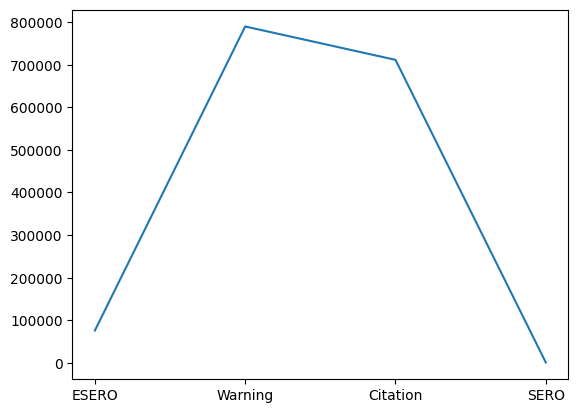

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = classes_dic.keys()
y = classes_dic.values()

print(x)
print(y)

plt.plot(x, y)
plt.show()

Since the distribution of classes is uneven. we need some normalization. And also when we are spliting the dataset we need to split it accordingly so that the distribution will not affect.

### 3. Spliting the dataset

### 3.1 For each class take X% as the train and Y% as train dataset. If the number of samples are less than 5 the we will consider all the samples for training in that case.

In [9]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install tqdm

In [10]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install sklearn

In [11]:
train_per = 60
test_per = 100 - train_per
threshold = 5

In [12]:
classes_dic_data = {}

tmp = dataset_without_id[:,:]


for i in tmp:
    if i[21] not in classes_dic_data.keys():
        classes_dic_data[i[21]] = []
    
    classes_dic_data[i[21]].append(i)

In [13]:
for i in classes_dic_data.keys():
    print(i, len(classes_dic_data[i]))

ESERO 75974
Warning 789812
Citation 711469
SERO 899


In [14]:
import sklearn
import sklearn.model_selection

test = []
train = []


import random

for i in classes_dic_data.keys():
    
    print(i, len(classes_dic_data[i]))
    
    if len(classes_dic_data[i]) < threshold:
        
        for j in classes_dic_data[i]:
            train.append(j)
            
    else:

        train_t, test_t = sklearn.model_selection.train_test_split(classes_dic_data[i], shuffle=True, test_size = test_per/100)
        
        for j in train_t:
            train.append(j)
        
        for j in test_t:
            test.append(j)

ESERO 75974
Warning 789812
Citation 711469
SERO 899


In [15]:
print("Train",len(train))
print("Test",len(test)) 
print("Total", len(train)+len(test)) # 1578154

Train 946891
Test 631263
Total 1578154


In [16]:
train = np.array(train)
test = np.array(test)

In [19]:
for i in range(train.shape[1]):
    cl = i
    dt = train[:,i]
    for j in range(dt.shape[0]):
        train[j][i] = one_hot[i][train[j][i]]


In [20]:
for i in range(test.shape[1]):
    cl = i
    dt = test[:,i]
    for j in range(dt.shape[0]):
        test[j][i] = one_hot[i][test[j][i]]

### 3.2 Dataset is preapared

In [21]:
train_X = np.delete(train,21,axis=1)
train_y = train[:,21]
test_X = np.delete(test,21,axis=1)
test_y = test[:,21]

In [24]:
train_X = train_X.astype("int32")
train_y = train_y.astype("int32")
test_X = test_X.astype("int32")
test_y = test_y.astype("int32")

In [25]:
train_X

array([[ 80110,    258,    291, ...,      1,      1,    143],
       [494869,   1530,   1247, ...,      1,      1, 432142],
       [618955,   1881,    283, ...,      0,      3, 540106],
       ...,
       [879125,   2735,   1236, ...,      1,      1, 759739],
       [849591,   2638,   1087, ...,      0,     10, 732395],
       [866266,   2687,    901, ...,      1,      1, 748630]], dtype=int32)

## Running the model

### 1. training the model

In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

from scikit_obliquetree.HHCART import HouseHolderCART
from scikit_obliquetree.segmentor import MSE, MeanSegmentor

reg = BaggingRegressor(
    HouseHolderCART(MSE(), MeanSegmentor(), max_depth=3),
    n_estimators=10,
    n_jobs=-1,
)

In [28]:
reg.fit(train_X, train_y)

BaggingRegressor(base_estimator=HouseHolderCART(impurity=<scikit_obliquetree.segmentor.MSE object at 0x7fec7833e550>,
                                                segmentor=<scikit_obliquetree.segmentor.MeanSegmentor object at 0x7fe988e9c590>),
                 n_jobs=-1)

In [30]:
print(reg.predict([test_X[0]]))
print(test_y[0])

[0.]
0


### 2. testing the model

In [31]:
true_res = 0

res = reg.predict(test_X)

In [43]:
res

array([0. , 0.1, 0. , ..., 3. , 3. , 3. ])

In [42]:
res1 = []

for i in range(len(res)):
    res1.append((res[i]+0.5)//1)

In [44]:
res1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [45]:
test_y

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [47]:
true_res=0

for i in range(res.shape[0]):
    if(int(res[i]) == int(test_y[i])):
        true_res +=1

accuracy = true_res/test_X.shape[0]

print(accuracy)

0.8079485095752483


In [48]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    
    #cm = np.log(cm+1)
    #cm = cm.astype("int32")
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5,5))
    #plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("fig_1_handling_the_class_imbalance.png")
    plt.show()

In [49]:
classes = range(4)

dic = {}
for i in range(4):
    dic[i] = i

print(dic)

cnf_array = []

for i in range(4):
    cnf_array.append([0]*4)
    
print(len(cnf_array))
print(len(cnf_array[0]))

# print(dic[test_y[0]])

for i in range(res.shape[0]):
#     print(test_y[i])
#     print(int(res1[i]))
#     print(dic[int(test_y[i])])
#     print(dic[int(res1[i])])
    
    cnf_array[dic[int(test_y[i])]][dic[int(res1[i])]] += 1

{0: 0, 1: 1, 2: 2, 3: 3}
4
4


In [50]:
print(cnf_array)

[[27476, 2312, 602, 0], [61, 293265, 22599, 0], [58, 6189, 278341, 0], [3, 3, 15, 339]]


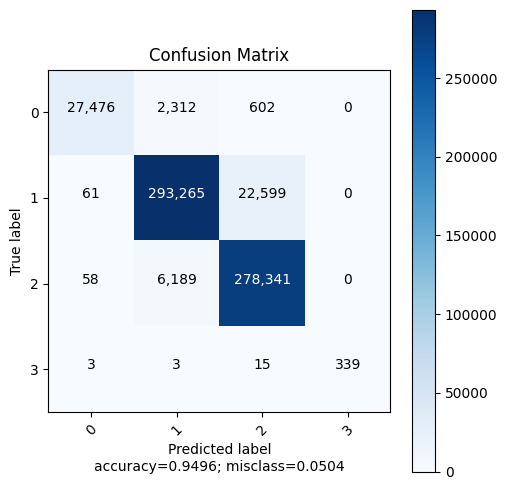

In [51]:
plot_confusion_matrix(cm= np.array(cnf_array), 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")